# Day 15: Chiton

https://adventofcode.com/2021/day/15

**What is the lowest total risk of any path from the top left to the bottom right?**

In [1]:
from IPython.display import Markdown
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#infile = 'test_input.txt'
#infile = 'test_input2.txt'
infile = 'input.txt'

dat = list()
with open(infile, 'r') as fid:
    for line in fid:
        dat.append([int(x) for x in line.strip()])
        
dat = np.array(dat, dtype=np.int)
#dat

In [3]:
# This input data is a graph where each location
# in the grid corresponds to a node and the value
# there is the edge cost for traveling to that node

# Generate the node ids
nodes = np.arange(np.product(dat.shape)).reshape(dat.shape)
i_nodes, j_nodes = np.mgrid[0:dat.shape[0], 0:dat.shape[1]]
#print(i_nodes)
#print(j_nodes)

In [4]:
graph = nx.DiGraph()
# Create nodes
for ii, d in np.ndenumerate(dat):
    graph.add_node(ii)
    
# Create edges
imax = dat.shape[0] - 1
jmax = dat.shape[1] - 1
for ii, d in np.ndenumerate(dat):
    if ii[0] < imax:
        graph.add_edge(ii, (ii[0]+1, ii[1]), cost=d)
    if ii[1] < jmax:
        graph.add_edge(ii, (ii[0], ii[1] + 1), cost=d)

In [5]:
#graph = nx.grid_2d_graph(*dat.shape)
#graph1 = nx.convert_node_labels_to_integers(graph0)



In [6]:
#nx.planar_layout(graph)

In [7]:
# Confirm cost attribute was added to the edges
#for k, v in graph.edges.items():
#    print("k: {}, v: {}".format(k, v))

In [30]:
def dist(n1, n2):
    # Return distance from n1 to n2
    (x1, y1) = n1
    (x2, y2) = n2
    return ((x1 - x2)**2 + (y1 - y2)**2) ** 0.5

In [8]:
# Find the shortest weighted path from start to finish
start = (0, 0)
finish = (dat.shape[0]-1, dat.shape[1]-1)

shortest_path = nx.dijkstra_path(graph, start, finish, weight='cost')
#shortest_path = nx.shortest_path(graph, start, finish, weight='cost')
#shortest_path = nx.astar_path(graph, start, finish, weight='cost')
#shortest_path = nx.astar_path(graph, start, finish, weight='cost', heuristic=dist)
#dist = nx.astar_path_length(graph, start, finish, weight='cost')
#dist
#dist, shortest_path = nx.bidirectional_dijkstra(graph, start, finish, weight='cost')
#shortest_path

#shortest_path_length = nx.dijkstra_path_length(graph, start, finish, weight='cost')
#shortest_path = nx.bellman_ford_path(graph, start, finish, weight='cost')

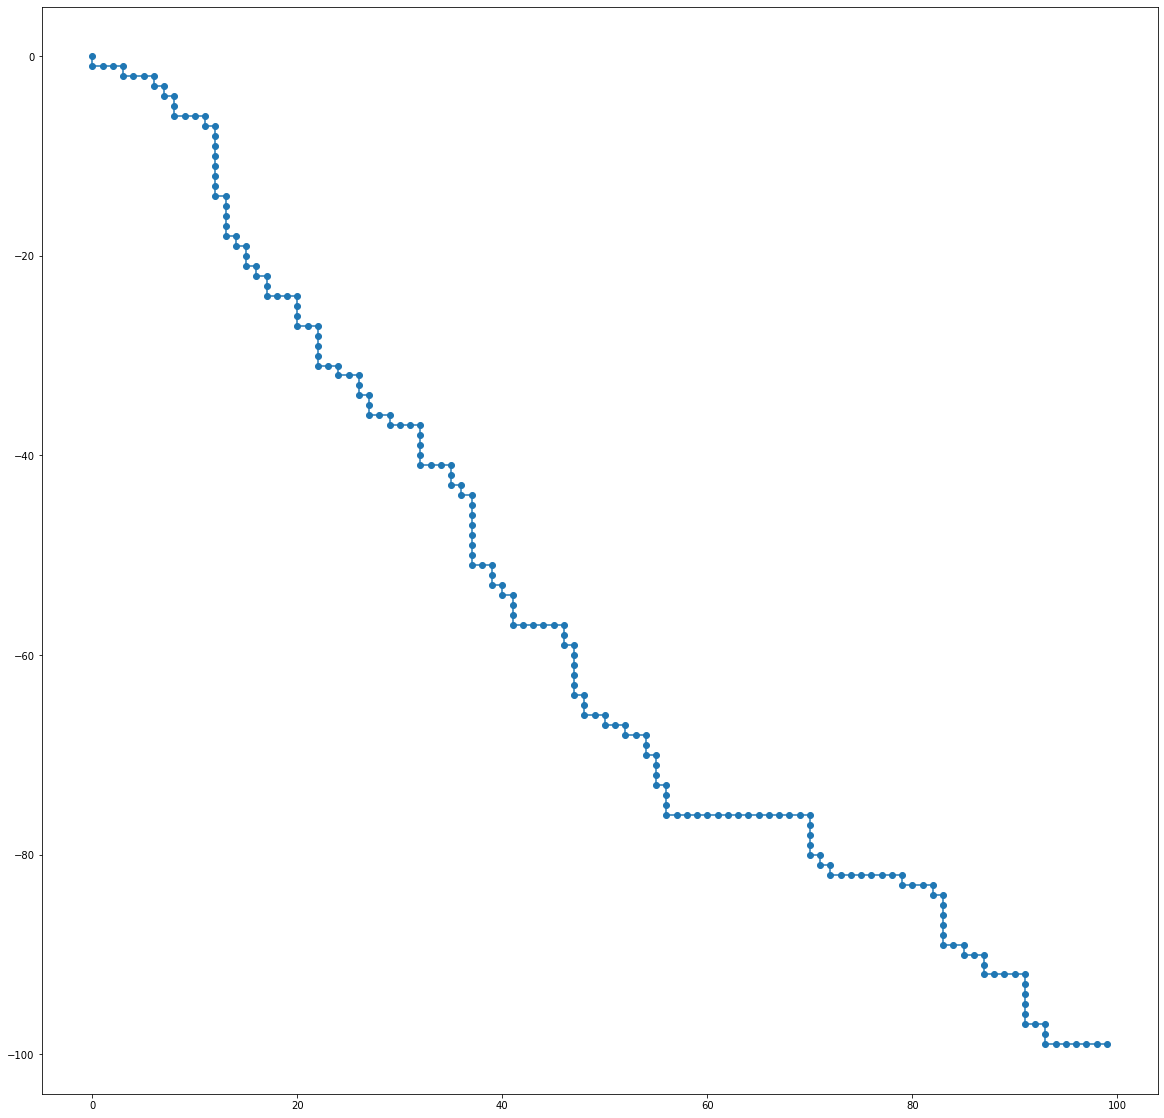

In [9]:
#yvals, xvals = list(zip(*shortest_path[:60]))
#yvals, xvals = list(zip(*shortest_path[60:160]))
#yvals, xvals = list(zip(*shortest_path[150:]))
yvals, xvals = list(zip(*shortest_path))

fig, ax = plt.subplots(figsize=(20, 20))
ax.plot(xvals, -np.array(yvals), marker='o')

In [10]:
# Add up risk values minus risk of starting point
risk_total0 = np.sum([dat[x] for x in shortest_path]) 
risk_total = risk_total0 - dat[(0, 0)]
Markdown("The lowest risk path is **{}** {}".format(risk_total, risk_total0))

The lowest risk path is **769** 776

In [11]:
# That's not the right answer; your answer is too high.
# (You guessed 775.)

In [12]:
# That's not the right answer; your answer is too low.
# (You guessed 767.)

In [13]:
# That's not the right answer; your answer is too high. 
# (You guessed 773.)

In [14]:
# That's not the right answer. Because you have guessed incorrectly 4 times on this puzzle,
# please wait 5 minutes before trying again.
# (You guessed 770.)

In [15]:
# That's not the right answer. Because you have guessed incorrectly 5 times on this puzzle,
# please wait 5 minutes before trying again.
# (You guessed 772.)

In [16]:
# //767// 768 **769** //770// 771 //772// //773// //774// //775//

In [17]:
for t in shortest_path[:10]:
    print("{} -> {}".format(t, dat[t]))

(0, 0) -> 7
(1, 0) -> 9
(1, 1) -> 5
(1, 2) -> 3
(1, 3) -> 2
(2, 3) -> 1
(2, 4) -> 8
(2, 5) -> 1
(2, 6) -> 4
(3, 6) -> 1


## Part Two

Using the full map, what is the lowest total risk of any path from the top left to the bottom right?

In [18]:
np.set_printoptions(edgeitems=10)
# Generate the additives for the 5x5 array
newrisk = np.array([[0, 1, 2, 3, 4],
                    [1, 2, 3, 4, 5],
                    [2, 3, 4, 5, 6],
                    [3, 4, 5, 6, 7],
                    [4, 5, 6, 7, 8]])

newmap = dict()
for ij, val in np.ndenumerate(newrisk):
    dat2 = dat + val
    dat2[dat2 > 9] = dat2[dat2 > 9] % 9
    newmap[ij] = dat2

In [19]:
vstack = list()
for i in range(newrisk.shape[0]):
    hstack = list()
    for j in range(newrisk.shape[1]):
        hstack.append(newmap[(i, j)])
    vstack.append(np.hstack(hstack.copy()))
    
newdat = np.vstack(vstack)
#newdat

In [29]:
graph2 = nx.DiGraph()
#graph2 = nx.Graph()
# Create nodes
for ij, d in np.ndenumerate(newdat):
    graph2.add_node(ij)
    
# Create edges
imax = newdat.shape[0] - 1
jmax = newdat.shape[1] - 1
for ij, d in np.ndenumerate(newdat):
    if ij[0] < imax:
        graph2.add_edge(ij, (ij[0]+1, ij[1]), cost=d)
    if ij[1] < jmax:
        graph2.add_edge(ij, (ij[0], ij[1] + 1), cost=d)

In [38]:
# Find the shortest weighted path from start to finish
start2 = (0, 0)
finish2 = (newdat.shape[0]-1, newdat.shape[1]-1)

shortest_path2 = nx.dijkstra_path(graph2, start2, finish2, weight='cost')
#shortest_path2 = nx.astar_path(graph2, start2, finish2, weight='cost')
#shortest_path2 = nx.astar_path(graph2, start2, finish2, weight='cost', heuristic=dist)


In [39]:
# Add up risk values minus risk of starting point
new_risk_total0 = np.sum([newdat[x] for x in shortest_path2]) 
new_risk_total = new_risk_total0 - newdat[(0, 0)]
Markdown("The lowest risk path is **{}** {}".format(new_risk_total, new_risk_total0))

The lowest risk path is **2970** 2977

In [40]:
# //2970//

In [41]:
# That's not the right answer; your answer is too high.
# Please wait one minute before trying again. 
# (You guessed 2970.)

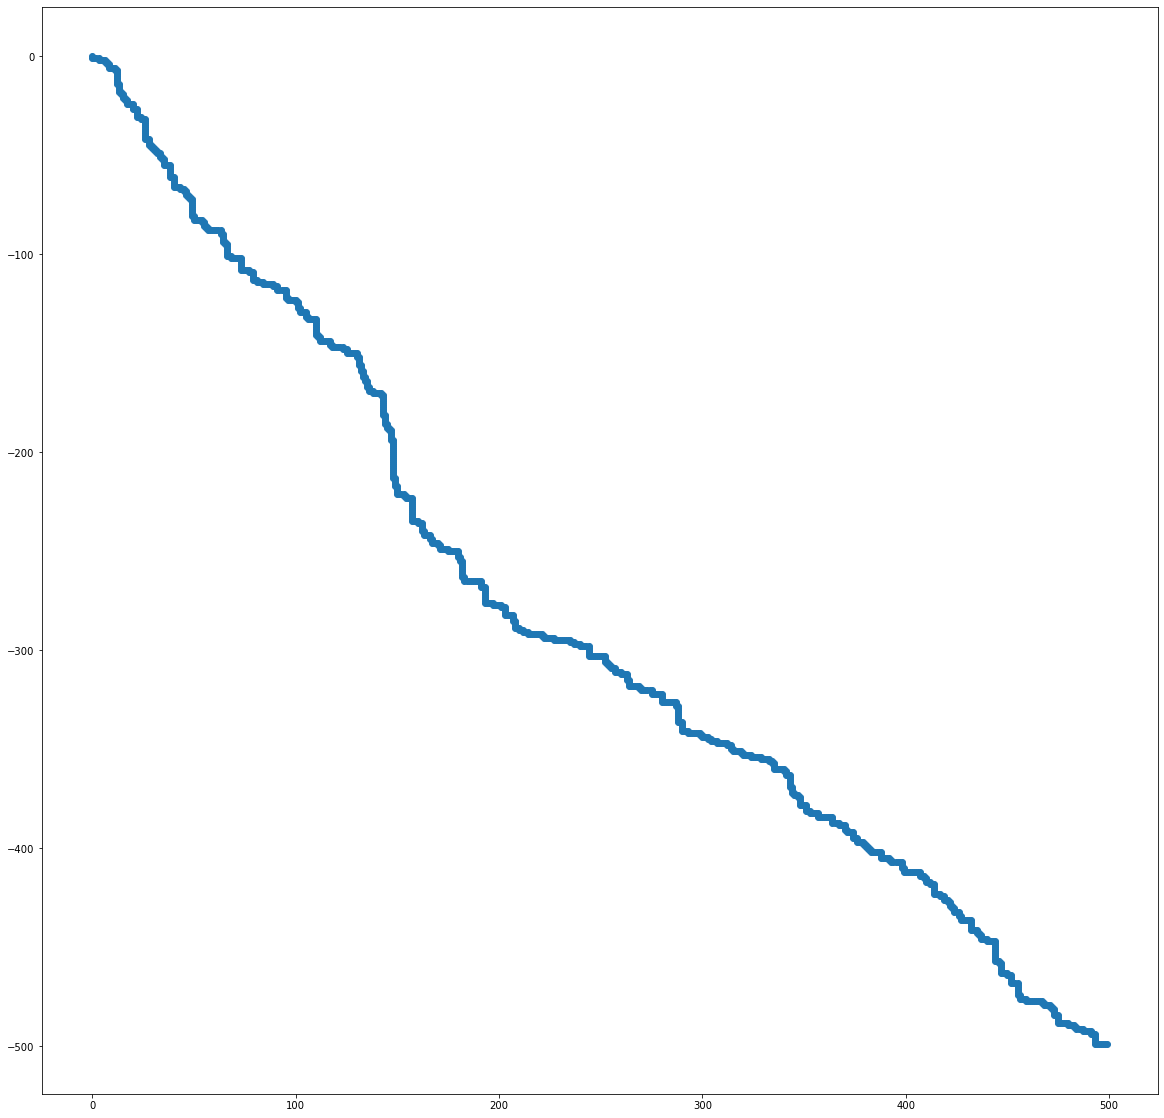

In [42]:
#yvals, xvals = list(zip(*shortest_path[:60]))
#yvals, xvals = list(zip(*shortest_path[60:160]))
#yvals, xvals = list(zip(*shortest_path[150:]))
yvals, xvals = list(zip(*shortest_path2))

fig, ax = plt.subplots(figsize=(20, 20))
ax.plot(xvals, -np.array(yvals), marker='o')